In [1]:
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

# Exercise One: Identifying handwritten numbers

## Preprocessing

In [2]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = keras.datasets.mnist.load_data()

Reshape and rescale train and test X

In [3]:
x_train = np.reshape(x_train_raw, (60000, 784))
x_test = np.reshape(x_test_raw, (10000, 784))

x_train = x_train / 255
x_test = x_test / 255

Convert y to categorical

In [6]:
y_train = keras.utils.to_categorical(y_train_raw, 10)
y_test = keras.utils.to_categorical(y_test_raw, 10)

## Model definition

In [5]:
#defining the model
model = keras.Sequential() 
model.add(keras.layers.Dense(256, input_shape=(784,))) 
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
#checking resulting model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

## Fitting the model

In [8]:
history = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12


375/375 [==============================] - 4s 7ms/step - loss: 0.4011 - accuracy: 0.8842 - val_loss: 0.2938 - val_accuracy: 0.9198
Epoch 2/12
375/375 [==============================] - 2s 5ms/step - loss: 0.3109 - accuracy: 0.9119 - val_loss: 0.2940 - val_accuracy: 0.9150
Epoch 3/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2969 - accuracy: 0.9178 - val_loss: 0.2809 - val_accuracy: 0.9219
Epoch 4/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2884 - accuracy: 0.9199 - val_loss: 0.2823 - val_accuracy: 0.9259
Epoch 5/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2827 - accuracy: 0.9223 - val_loss: 0.2813 - val_accuracy: 0.9233
Epoch 6/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2791 - accuracy: 0.9227 - val_loss: 0.2944 - val_accuracy: 0.9196
Epoch 7/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2751 - accuracy: 0.9230 - val_loss: 0.2901 - val_accuracy: 0.9189
Epoc

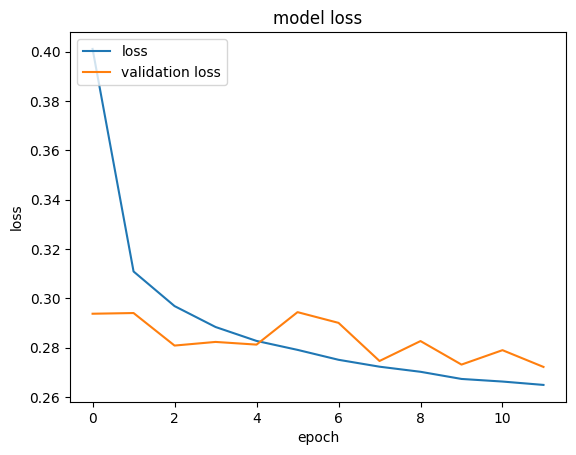

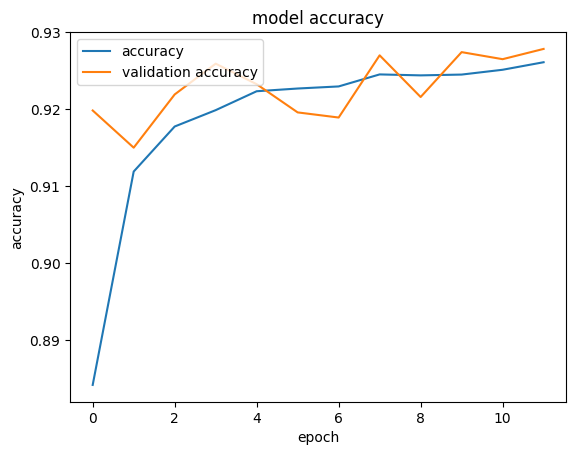

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper left')
plt.show()

#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='upper left')
plt.show()

In [10]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

#checking whether loss & accuracy are acceptable
print(loss, accuracy)

0.27345308661460876 0.9253000020980835


### Making a new model with relu activation:

In [11]:
#defining the model
model = keras.Sequential() 
model.add(keras.layers.Dense(256, input_shape=(784,), activation='relu'))  # Use ReLU activation in the first layer
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [13]:
history = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 3s 7ms/step - loss: 0.3245 - accuracy: 0.9098 - val_loss: 0.1717 - val_accuracy: 0.9521
Epoch 2/12
375/375 [==============================] - 2s 6ms/step - loss: 0.1455 - accuracy: 0.9582 - val_loss: 0.1259 - val_accuracy: 0.9618
Epoch 3/12
375/375 [==============================] - 2s 6ms/step - loss: 0.1003 - accuracy: 0.9707 - val_loss: 0.1109 - val_accuracy: 0.9678
Epoch 4/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0758 - accuracy: 0.9777 - val_loss: 0.0964 - val_accuracy: 0.9707
Epoch 5/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0586 - accuracy: 0.9828 - val_loss: 0.0897 - val_accuracy: 0.9734
Epoch 6/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0478 - accuracy: 0.9855 - val_loss: 0.0876 - val_accuracy: 0.9743
Epoch 7/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0383 - accuracy: 0.9893 - val_loss: 0.0807 - val_accuracy: 0.9760
Epoch 

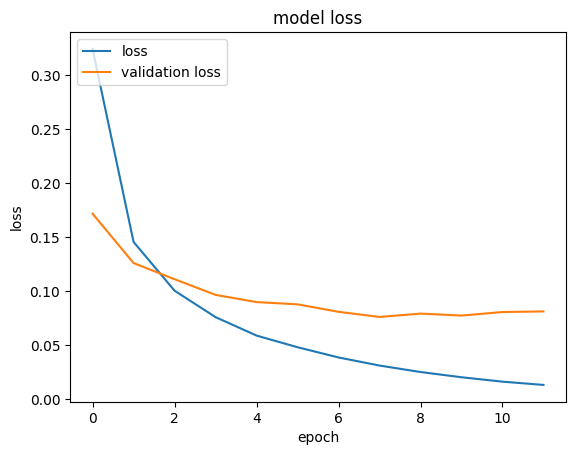

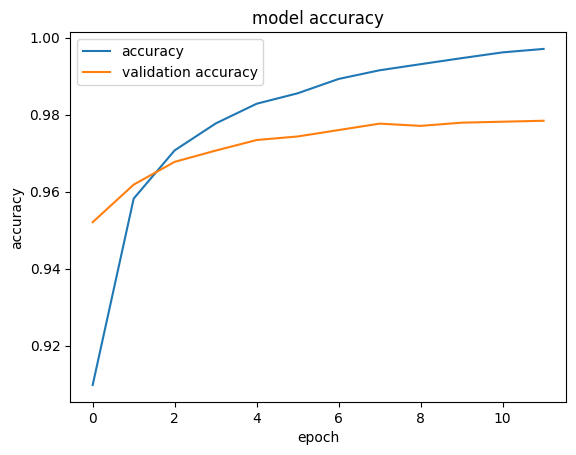

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper left')
plt.show()

#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='upper left')
plt.show()

## Deep convolutional networks

In [3]:
x_train = np.reshape(x_train_raw, (60000, 28, 28, 1))
x_test = np.reshape(x_test_raw, (10000, 28, 28, 1))

x_train = x_train / 255
x_test = x_test / 255

In [16]:
model = keras.Sequential() 
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1))) 
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")) 
model.add(keras.layers.MaxPool2D(pool_size=(2, 2))) 
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(128, activation="relu")) 
model.add(keras.layers.Dense(10, activation="softmax")) 
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=1), metrics='accuracy')

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [18]:
history = model.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 25s 62ms/step - loss: 0.2455 - accuracy: 0.9252 - val_loss: 0.0784 - val_accuracy: 0.9777
Epoch 2/6
375/375 [==============================] - 22s 60ms/step - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.0519 - val_accuracy: 0.9852
Epoch 3/6
375/375 [==============================] - 23s 60ms/step - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.0398 - val_accuracy: 0.9887
Epoch 4/6
375/375 [==============================] - 24s 63ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0460 - val_accuracy: 0.9872
Epoch 5/6
375/375 [==============================] - 25s 68ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.0415 - val_accuracy: 0.9887
Epoch 6/6
375/375 [==============================] - 25s 67ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.0448 - val_accuracy: 0.9881


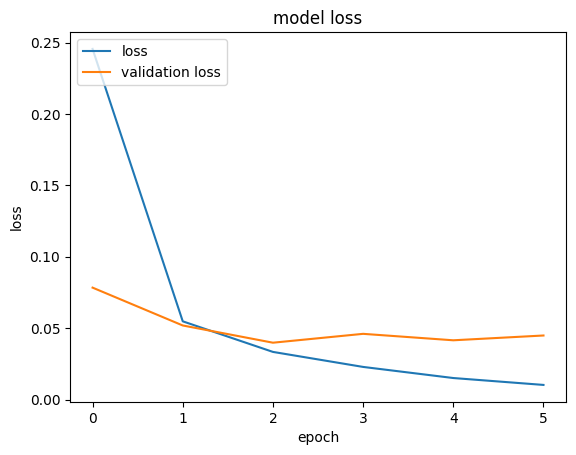

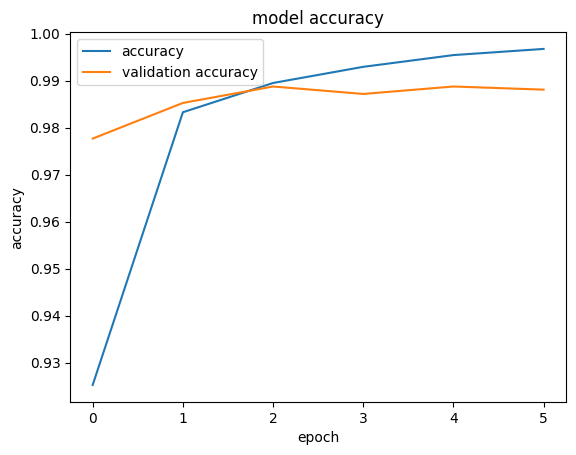

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper left')
plt.show()

#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='upper left')
plt.show()

In [20]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

#checking whether loss & accuracy are acceptable
print(loss, accuracy)

0.03844963386654854 0.9887999892234802


Dropout model:

In [4]:
model = keras.Sequential() 
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1))) 
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")) 
model.add(keras.layers.MaxPool2D(pool_size=(2, 2))) 
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(128, activation="relu")) 
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax")) 
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=1), metrics='accuracy')

In [7]:
history = model.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6


375/375 [==============================] - 28s 70ms/step - loss: 0.3027 - accuracy: 0.9055 - val_loss: 0.0760 - val_accuracy: 0.9785
Epoch 2/6
375/375 [==============================] - 25s 68ms/step - loss: 0.1038 - accuracy: 0.9692 - val_loss: 0.0524 - val_accuracy: 0.9856
Epoch 3/6
375/375 [==============================] - 25s 68ms/step - loss: 0.0754 - accuracy: 0.9772 - val_loss: 0.0479 - val_accuracy: 0.9864
Epoch 4/6
375/375 [==============================] - 27s 71ms/step - loss: 0.0618 - accuracy: 0.9815 - val_loss: 0.0413 - val_accuracy: 0.9877
Epoch 5/6
375/375 [==============================] - 26s 70ms/step - loss: 0.0513 - accuracy: 0.9843 - val_loss: 0.0398 - val_accuracy: 0.9884
Epoch 6/6
375/375 [==============================] - 26s 70ms/step - loss: 0.0451 - accuracy: 0.9863 - val_loss: 0.0398 - val_accuracy: 0.9891


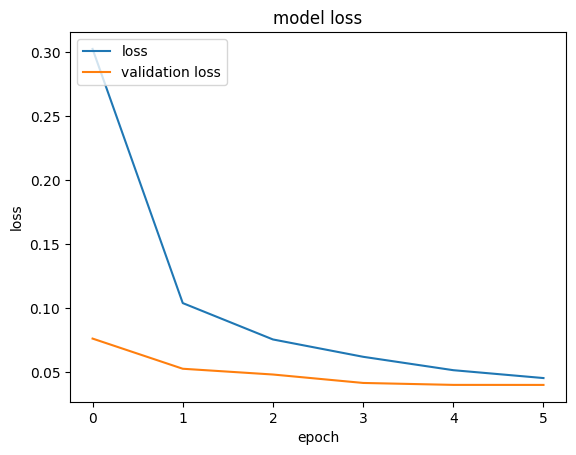

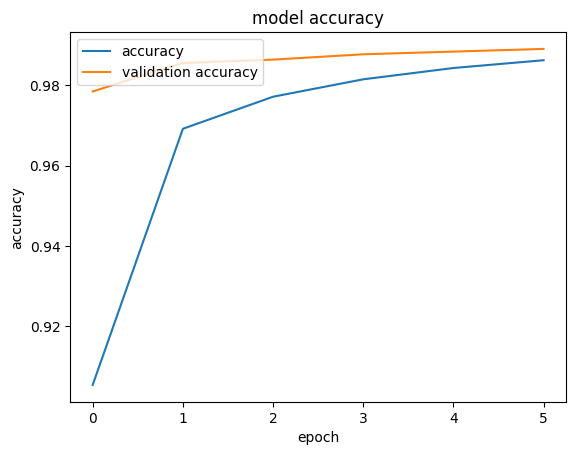

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper left')
plt.show()

#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='upper left')
plt.show()

# Excercise 2: